# Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Data from GitHub

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/pranitee23/Data-Science-Methods-and-Tools/main/onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# Getting Insights from Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Exploratory Data Analysis

<ipython-input-11-ba8f06a3d159>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Output', data=df, palette=custom_palette)


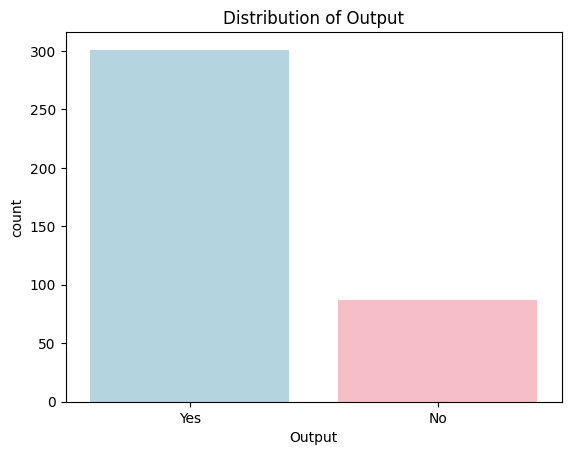

In [11]:
# Define custom colors for each category in the 'Output' column
custom_palette = {'No': 'lightpink', 'Yes': 'lightblue'}

# Create countplot with custom colors
sns.countplot(x='Output', data=df, palette=custom_palette)
plt.title('Distribution of Output')
plt.show()

This bar graph titled "Distribution of Output." It is a simpler graph compared to the first one, showing the overall count of "Yes" and "No" responses regardless of gender or any other variable. The "Yes" responses are much higher in count compared to the "No" responses.


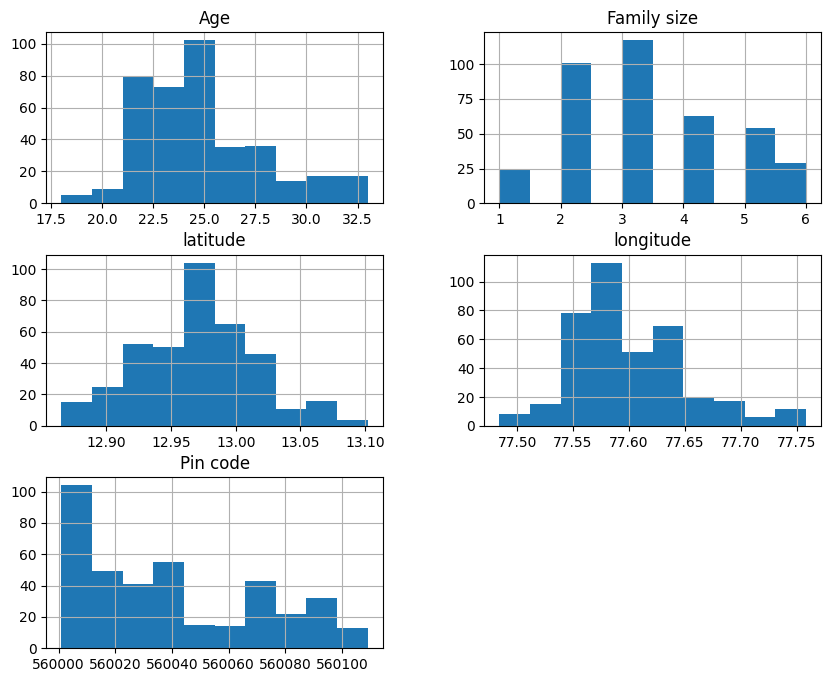

In [9]:
df.hist(figsize=(10, 8))
plt.show()


1. Age: This histogram shows the distribution of ages within the dataset. The x-axis represents age ranges, and the y-axis represents the count of individuals within those ranges. The distribution looks roughly bell-shaped, indicating a normal distribution, with the majority of individuals concentrated in the mid-age ranges.

2. Latitude: This histogram shows the distribution of latitude coordinates associated with the dataset. The x-axis represents the latitude values, and the y-axis represents the count of occurrences at each latitude. It appears that there are two major clusters, suggesting that the data points may be concentrated around two distinct latitude areas.

3. Family Size: This histogram shows the distribution of family sizes. The x-axis represents different family sizes, and the y-axis represents the count of families with those sizes. There is a decreasing trend as family size increases, indicating that smaller families are more common in this dataset.

4. Longitude: This histogram shows the distribution of longitude coordinates. Similar to the latitude histogram, the x-axis represents longitude values, and the y-axis represents the count of occurrences at each longitude. The distribution shows a single cluster with a peak, indicating that most data points are concentrated around a particular longitude.

5. Pin Code: This histogram displays the distribution of pin codes (postal codes) in the dataset. The x-axis represents the range of pin codes, and the y-axis represents the frequency of each pin code. The distribution is multimodal, with several peaks, suggesting that the dataset includes individuals from various postal code regions, with certain codes being more frequent than others.

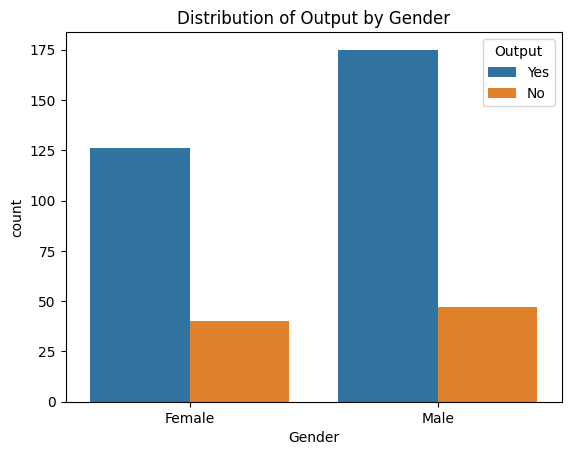

In [12]:
sns.countplot(x='Gender', hue='Output', data=df)
plt.title('Distribution of Output by Gender')
plt.show()

This graph shows the count of outputs ("Yes" and "No") for each gender ("Female" and "Male"). From the graph, it appears that the number of "Yes" responses is higher for both genders compared to "No" responses, with males having a significantly higher count of "Yes" responses than females. There is a legend indicating the color coding for "Yes" (blue) and "No" (orange) categories.

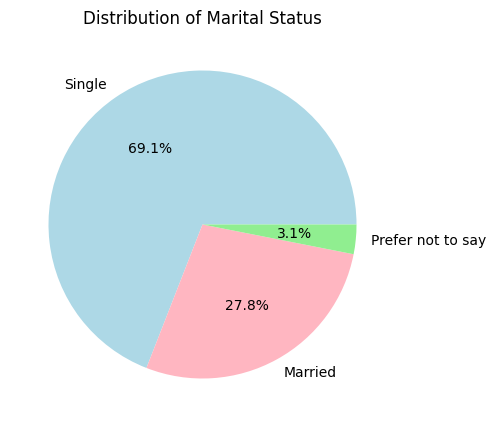

In [15]:
marital_status_counts = df['Marital Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink', 'lightgreen'])
plt.title('Distribution of Marital Status')
plt.show()


The image is a pie chart titled "Distribution of Marital Status." It shows the proportion of individuals by their marital status in the dataset. There are three categories represented:

Single: Making up the majority of the chart with 69.1%.
Married: Representing 27.8% of the dataset.
Prefer not to say: The smallest slice at 3.1%.

In [21]:
from plotly import express

for color in ['Gender', 'Marital Status', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']:
    express.scatter_mapbox(data_frame=df, lat='latitude', lon='longitude', color=color, size='Family size', mapbox_style='open-street-map', zoom=10, height=800).show()

1. The image is a map with a scatter plot overlay, representing individuals' locations within a specific area, color-coded by marital status:

Single: Represented by one color (possibly blue).
Married: Represented by another color (possibly red).
Prefer not to say: Represented by a third color (possibly green).
The size of the dots might still represent the 'Family size' as per your previous code snippet, although it isn't explicitly stated in the legend of this particular map.

This map allows for visual analysis of marital status across geographical locations in the Bangalore area. It appears that there is a mix of single and married individuals throughout, with a few who prefer not to state their marital status. Visualizations like this can be useful for identifying patterns based on geography, such as areas with higher concentrations of single or married individuals, which might correlate with other socio-economic factors.


2. The image is a geospatial scatter plot depicting individuals in a region, color-coded by marital status, with a legend indicating the colors for 'Single', 'Married', and 'Prefer not to say'. It provides a visual representation of marital status distribution within the geographic context of what seems to be the Bangalore area in India. Here's how to interpret the plot:

Color Coding: Each data point (dot) represents an individual, colored based on their marital status. For instance, blue might represent single individuals, red could represent married individuals, and green might be used for those who prefer not to disclose their marital status.
Spatial Distribution: The plot allows us to see where single, married, and undisclosed individuals are concentrated geographically. It seems that there is a mix of marital statuses across the area, with no immediate visible pattern of segregation by marital status.
Density and Clustering: The density of the dots can give insights into where the population is more concentrated.

3. The image displays a geospatial scatter plot overlaid on a map, with data points representing individuals' locations within a region, this time color-coded according to their monthly income. The legend on the right shows different income ranges:

No Income
Below Rs. 10000
10001 to 25000
25001 to 50000
More than 50000
Each point on the map corresponds to an individual's location, and the color indicates their income bracket. From this visualization, we can observe the economic diversity within the region, with a spread of different income levels. Areas with a higher concentration of a certain color may indicate neighborhoods with particular income levels.

4. This image is another geospatial scatter plot that maps the educational qualifications of individuals across a region, which appears to be Bangalore, India. The points are color-coded to represent different levels of educational attainment:

Post Graduate
Graduate
Ph.D.
Uneducated
School
Each dot on the map corresponds to an individual’s location, and the color indicates their highest level of education. The spread and concentration of colors can provide insights into the educational distribution across different areas. For example, if one area has a high concentration of "Post Graduate" colored dots, it might suggest a region with a higher education level, possibly correlating with areas of higher socio-economic status or certain types of employment hubs.

Clusters of a particular color, such as "Uneducated" or "School," may highlight regions where educational interventions could be targeted. These visualizations are powerful for understanding demographic and educational landscapes, which can be crucial for local governments, educational institutions, and NGOs in policy-making and resource allocation.

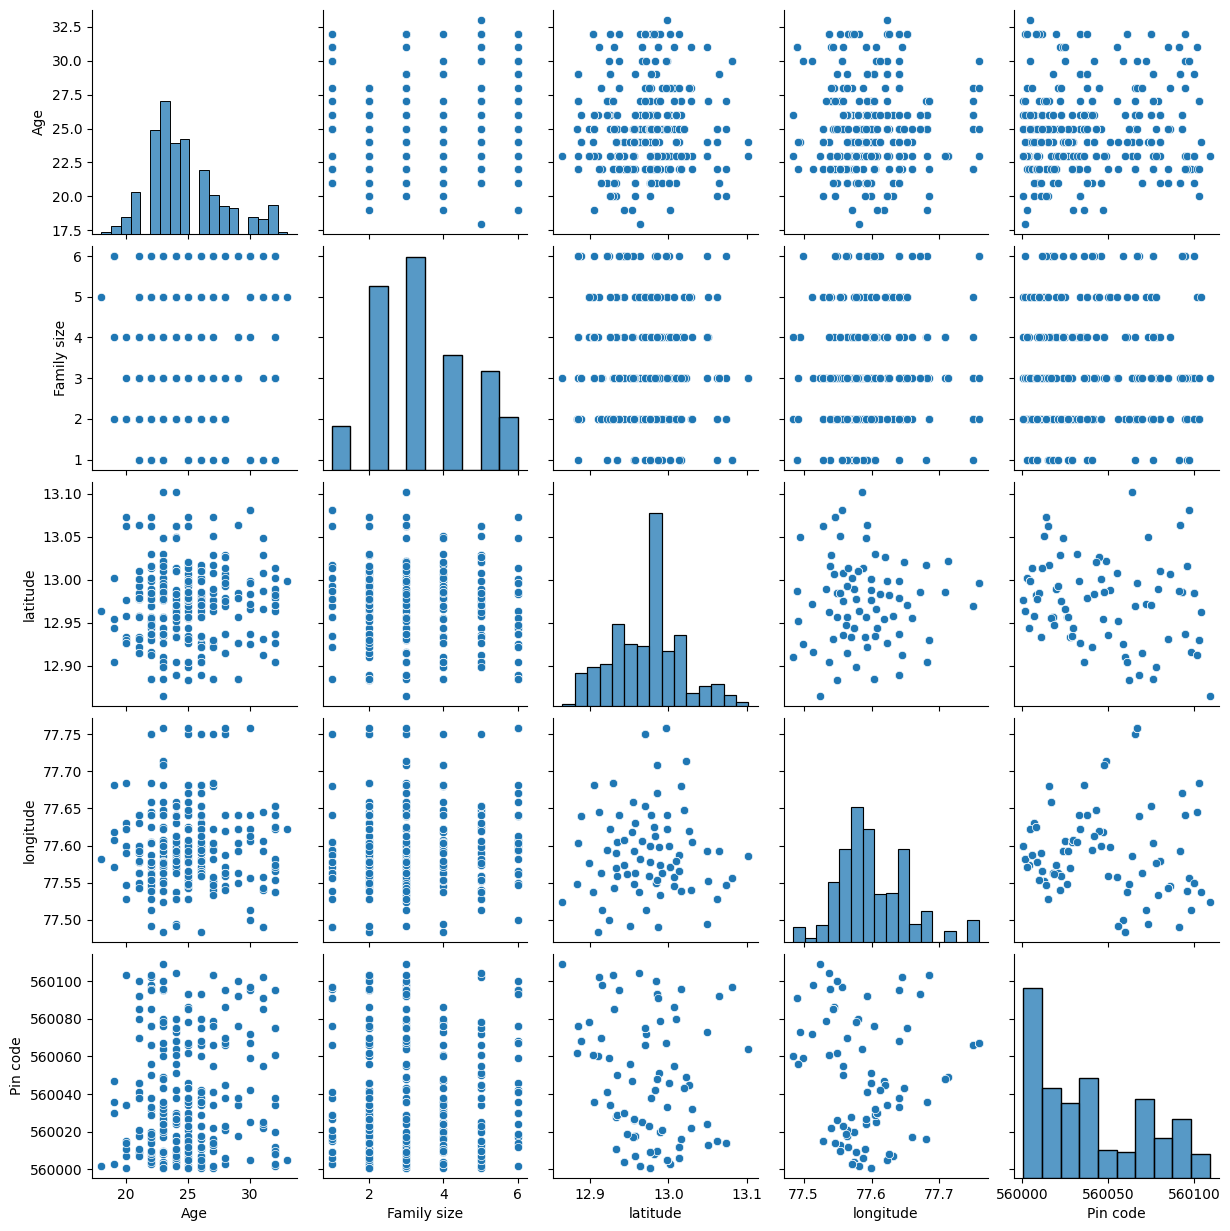

In [16]:
sns.pairplot(df)
plt.show()

Histograms (on the diagonal):
The top left histogram represents the age distribution. It looks approximately normally distributed with a single peak.
The bottom left/second-row histogram shows the distribution of family sizes. It suggests that smaller families are more common.

Scatter Plots (off-diagonal):
Directly above the family size histogram, the scatter plot comparing family size and age is visible. Each dot represents a data point. If there is a trend, it would suggest a relationship between age and family size (though no obvious trend can be discerned from the snippet).
The other scatter plots would show relationships between the other variables in the dataset.


Diagonal Histograms: The central plots on the diagonal are histograms for each variable (latitude and longitude). They show the frequency distribution of each variable. For both latitude and longitude, the distributions appear to be multi-modal, suggesting that there are clusters of locations where more data points are concentrated.
Off-Diagonal Scatter Plots: The scatter plots show the relationships between latitude and longitude. From these plots, you can infer spatial patterns or clusters. The upper right and lower left scatter plots are mirror images of each other, each plot showing latitude on one axis and longitude on the other.

Latitude vs. Longitude: There are clear clusters in these plots, which suggests that the data points are grouped in certain geographic areas. This could represent different neighborhoods or regions within a city or multiple cities.
Data Spread: The spread of the data points in the scatter plots indicates the geographic area covered by the dataset. A wider spread suggests a larger geographic area.

# Label Encoding

In [22]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

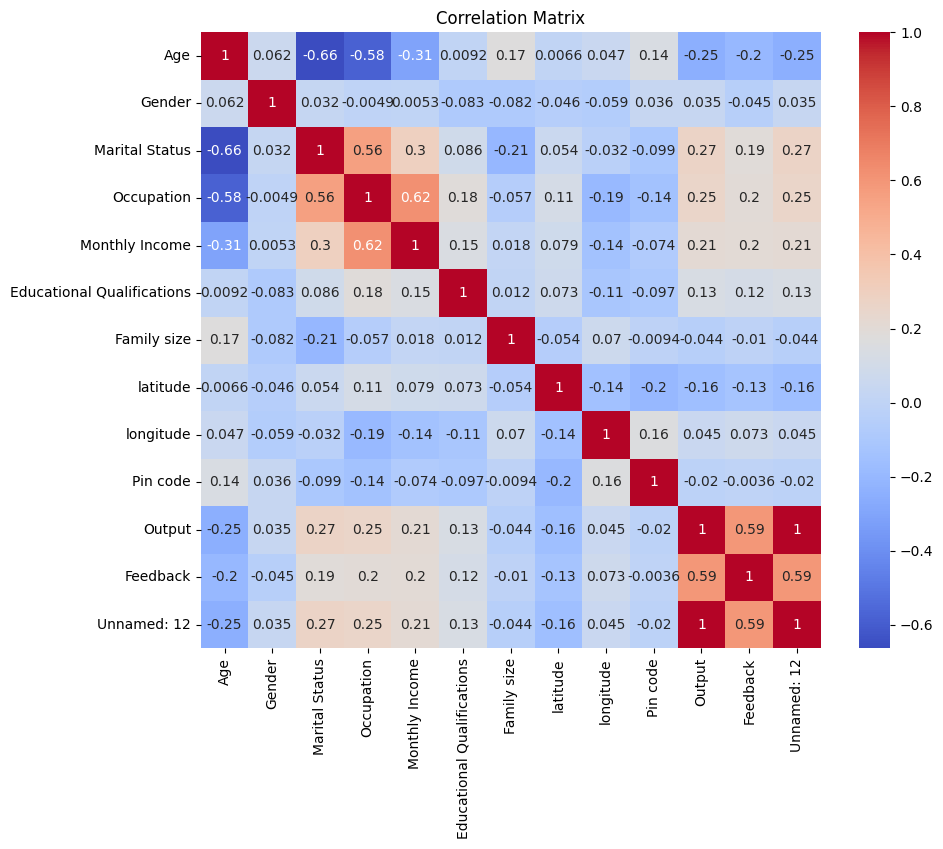

In [19]:
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Values close to +1 or -1: A correlation coefficient close to +1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, a coefficient close to -1 indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease.

- Values close to 0: A correlation coefficient close to 0 indicates little to no linear relationship between the variables.

- Diagonal: The diagonal, where each variable intersects with itself, is always 1 because a variable is perfectly correlated with itself.

- Color Intensity: The color scale on the right shows that red shades represent positive correlations and blue shades represent negative correlations. Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker correlations.

- Significant Correlations in Your Matrix:
Marital Status and Occupation show a positive correlation of 0.56, suggesting some relationship between these two variables.
Marital Status and Age show a negative correlation of -0.66, indicating that younger individuals are less likely to be married in this dataset.
Occupation and Monthly Income have a correlation of 0.62, implying that the type of occupation is strongly associated with the level of income.
Feedback and Output have a positive correlation of 0.59, suggesting that the output is somewhat associated with the feedback given.

# Dropping columns and Train Test Split

In [23]:
# Split the data into features and target variable
X = df.drop(columns=['Output', 'Unnamed: 12'])
y = df['Output']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [25]:
# Model Building and Evaluation
# Pipeline for preprocessing and model building
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [26]:
# Define hyperparameters for GridSearchCV
params = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

In [27]:
# GridSearchCV to find best parameters
grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]})

In [28]:
# Print best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


In [29]:
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Model Evaluation

In [30]:
# Model Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8846153846153846


# Classification Reports and Confusion Matrix

In [31]:
# Classification Report
print("Classification Report for Training Data:")
print(classification_report(y_train, y_pred_train))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       235

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [32]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.93      0.94      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.88      0.88      0.88        78



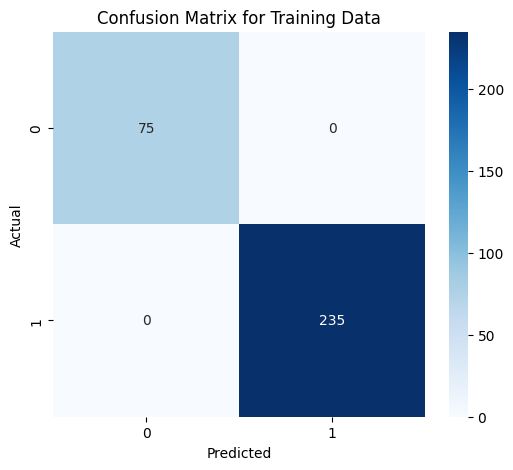

In [36]:
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Positives (TP): The cases in which the model correctly predicted the positive class. Here, we have 235 instances where the model predicted class '1' and the actual class was '1'.

True Negatives (TN): The cases in which the model correctly predicted the negative class. This matrix shows 75 instances where the model predicted class '0' and the actual class was '0'.

False Positives (FP): The cases in which the model incorrectly predicted the positive class. In this matrix, there are 0 instances of this type, meaning the model did not incorrectly predict any negative class as positive.

False Negatives (FN): The cases in which the model incorrectly predicted the negative class. There are also 0 instances of this type, meaning the model did not incorrectly predict any positive class as negative.

The confusion matrix for this model indicates perfect classification on the training data, with no false positives or false negatives. While this might seem ideal, it is also a cause for scrutiny, as models that perform too well on training data may be overfitted and might not generalize well to unseen data.

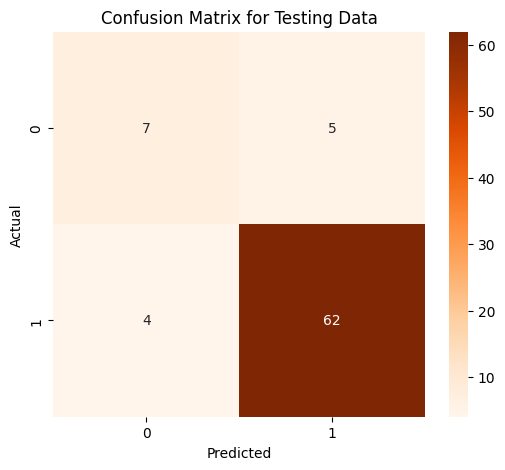

In [38]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, cmap='Oranges', fmt='d')
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

True Negatives (TN): 7 instances where the model correctly predicted the actual negative class (0).

True Positives (TP): 62 instances where the model correctly predicted the actual positive class (1).

False Positives (FP): 5 instances where the model incorrectly predicted the positive class (1) when it was actually negative (0).

False Negatives (FN): 4 instances where the model incorrectly predicted the negative class (0) when it was actually positive (1).

Here’s a brief analysis:

Accuracy: The model correctly predicted 69 out of 78 instances (TN+TP), which gives an accuracy of 88.5%. This is calculated as (TN+TP) / (TN+TP+FN+FP).

Precision: The precision of the model for the positive class is quite high. Precision is calculated as TP / (TP+FP), which is 62 / (62+5) in this case.

Recall: The recall (also known as sensitivity) for the positive class is also good, which is calculated as TP / (TP+FN), which is 62 / (62+4).

Specificity: The specificity (true negative rate) for the negative class is TP / (TN+FP), which is 7 / (7+5).
